In [5]:
import numpy as np
import pandas as pd

In [6]:
z=pd.read_csv("Studentscorev1.csv")
x=z.Hours
y=z.Scores
n=len(x)

In [7]:
z

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [8]:
## Now lets define cost function
#y=theta1.x+theta0

In [9]:
type(z.Hours)

pandas.core.series.Series

In [10]:
def cost_function(theta1):
    x=z.Hours
    y=z.Scores
    n=len(x)
    sum_of_error=[]
    for i in range(n):
        x.theta1=x[i]*theta1
        error=x.theta1-y[i]
        error_square=error*error
        sum_of_error.append(error_square)
    j=(0.5*sum(sum_of_error))/n
        
    return j
    

In [11]:
cost_function(1.5)

1190.38235

In [12]:
# def gradient_descent(aplha,iters,theta1):
#     x=z.Hours
#     y=z.Scores
#     n=len(x)
#     d_theta=[]
#     for i in range(iters):
#         d_theta.append((theta1*x[i]-y[i])*x[i])
    
#     theta1=theta1-aplha*sum(d_theta)*(1/n)
    
#     return theta1
    

In [21]:
def gradient_descent1(alpha,iters):
    x=z.Hours
    y=z.Scores
    n=len(x)
    theta0=0
    theta1=0
    
    for h in range(iters):
        d_theta1=[]
        d_theta0=[]   
        for i in range(n):
            d_theta1.append((theta1*x[i]-y[i])*x[i])
            d_theta0.append(theta1*x[i]-y[i])

        theta1=theta1-alpha*sum(d_theta1)*(1/n)
        theta0=theta0-alpha*sum(d_theta0)*(1/n)

    return theta1,theta0

In [22]:
# def predict(x,iters,alpha):
#     x=z.Hours
#     y=z.Scores
#     n=len(x)
#     theta0=0
#     theta1=0
    
#     for i in range(iters):
#         d_theta1=[]
#         d_theta0=[]
#         for i in range(n):
#             d_theta1.append((theta1*x[i]-y[i])*x[i])
#             d_theta0.append(theta1*x[i]-y[i])
    
#     theta1=theta1-alpha*sum(d_theta1)*(1/n)
#     theta0=theta0-alpha*sum(d_theta0)*(1/n)
    
#     return theta0,theta1

In [49]:
theta1,theta0=gradient_descent1(0.001,1000)
def predict(x):
    return theta0+theta1*x
predict(9.25), R_square()

(96.23074915300167, -3.6554308050960493)

In [24]:
def R_square():
    import statistics
    SSE=[]
    SST=[]
    RMSE=[]
    n=len(z.Hours)
    for i in range(n):
        e=(predict(x[i])-statistics.mean(z.Scores))**2
        t=(y[i]-statistics.mean(z.Scores))**2
        u=(predict(x[i])-y[i])**2
        SSE.append(e)
        SST.append(t)
        RMSE.append(u)
        

    R_square=1-(sum(SSE))/(sum(SST))
    return R_square*100

In [25]:
R_square()

-23.140445990135117

In [26]:
for i in range(n):
    print(y[i],predict(x[i]))

21 14.03496821962148
47 27.74020705824483
27 17.72484021463546
75 45.662442462598456
30 19.30621392678431
20 8.76372251245865
88 49.35231445761243
60 29.848705341109966
81 44.60819332116589
25 15.089217361054045
85 41.44544589686819
62 31.9572036239751
41 24.577459633947136
42 18.251964785351742
17 6.655224229593519
95 47.77094074546359
30 14.03496821962148
24 10.87222079532378
67 33.01145276540766
69 39.86407218471934
30 15.089217361054045
54 26.158833346095985
35 20.887587638933155
76 37.22844933113793
86 41.972570467584475


# Solution given by TSF

In [28]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns

In [29]:
# Reading data from remote link
url = "http://bit.ly/w-data"
s_data = pd.read_csv(url)
print("Data imported successfully")

s_data

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


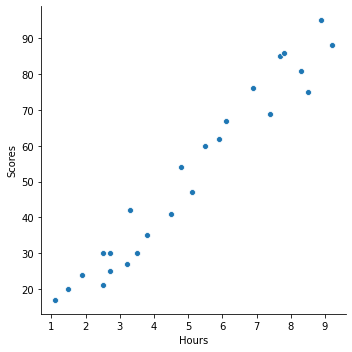

In [30]:
# scatter plot
sns.relplot(x="Hours", y="Scores", data=s_data, kind="scatter");

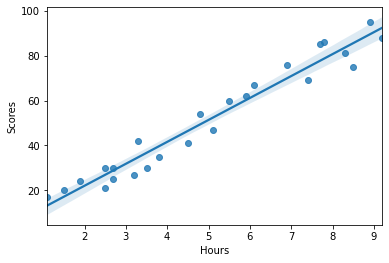

In [31]:
sns.regplot(x="Hours", y="Scores", data=s_data)

In [32]:
X = z.iloc[:, :-1].values  
Y = z.iloc[:, 1].values  

In [33]:
# X=z.Hours
# Y=z.Scores

In [34]:
from sklearn.model_selection import train_test_split  
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=4)

# Training the algorithm

In [35]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, Y_train) 

print("Training complete.")

Training complete.


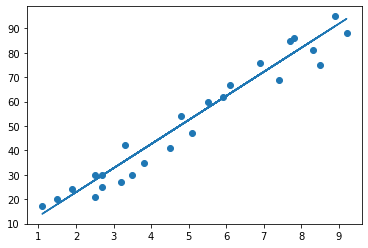

In [36]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, Y)
plt.plot(X, line);
plt.show()


## **Making Predictions**
Now that we have trained our algorithm, it's time to make some predictions.

In [37]:
print(X_test) # Testing data - In Hours
Y_pred = regressor.predict(X_test) # Predicting the scores

[[3.8]
 [4.8]
 [2.5]
 [8.5]
 [4.5]]


In [38]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})  
df 

,Actual,Predicted
0,35,40.604168
1,54,50.481812
2,21,27.763230
3,75,87.029097
4,41,47.518519


In [45]:
# You can also test with your own data
hours = np.array([[9.25,]])
own_pred = regressor.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 94.43733048038092


# **Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [40]:
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(Y_test, Y_pred)) 

Mean Absolute Error: 6.8866403471761775


In [41]:
import sklearn as sk
sk.metrics.mean_squared_error(Y_test, Y_pred, sample_weight=None, multioutput='uniform_average', squared=True)

55.343178161924186

In [42]:
np.sqrt(sk.metrics.mean_squared_error(Y_test, Y_pred, sample_weight=None, multioutput='uniform_average', squared=True))

7.43929957468606

In [43]:
import sklearn as sk
sk.metrics.r2_score(Y_test, Y_pred,sample_weight=None, multioutput='uniform_average')

0.8345792140066828

In [44]:
for i in range(n):
    print (y[i],predict(X[i]))

21 [14.03496822]
47 [27.74020706]
27 [17.72484021]
75 [45.66244246]
30 [19.30621393]
20 [8.76372251]
88 [49.35231446]
60 [29.84870534]
81 [44.60819332]
25 [15.08921736]
85 [41.4454459]
62 [31.95720362]
41 [24.57745963]
42 [18.25196479]
17 [6.65522423]
95 [47.77094075]
30 [14.03496822]
24 [10.8722208]
67 [33.01145277]
69 [39.86407218]
30 [15.08921736]
54 [26.15883335]
35 [20.88758764]
76 [37.22844933]
86 [41.97257047]


In [46]:
j=sk.linear_model.SGDRegressor(loss='squared_loss', penalty='l2', alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=1000, tol=0.001, shuffle=True, verbose=0, epsilon=0.1, random_state=None, learning_rate='invscaling', eta0=0.01, power_t=0.25, early_stopping=False, validation_fraction=0.1, n_iter_no_change=5, warm_start=False, average=False)

In [47]:
j.fit(X, Y)

SGDRegressor()

In [48]:
predict(9.25)

49.61587674297058